<a href="https://colab.research.google.com/github/guilhermelaviola/PredictiveModel/blob/main/PredictiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Importing Python libraries
# Importing all the necessary libraries for us to start creating the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
# Step 2: Reading the Dataset
# Importing the dataframe (df) and displaying it
df = pd.read_csv("sales_california.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
0,Sacramento,1947,5264.8,1654.4,382.6,6693.9,4364.7,3297.2,96.9,7125.8,7731.6,5446.9,9815.0,9307.8,57146.2,False
1,Sacramento,1948,4888.7,9959.3,3591.5,4845.1,9811.5,4929.2,6976.1,7292.2,4270.3,2215.1,9106.9,7647.6,6882.5,True
2,Sacramento,1949,8615.3,6641.9,6733.5,6606.3,2616.9,854.7,5686.3,7295.0,5341.1,1510.5,9070.2,5269.0,65925.4,False
3,Sacramento,1950,5974.7,5770.8,7024.3,7266.3,5334.6,3526.6,5230.5,3849.0,7941.8,7819.7,2162.8,9248.4,95556.1,False
4,Sacramento,1951,8565.0,524.6,5931.8,4238.8,4163.1,812.1,7985.6,3772.6,6133.6,8181.9,8963.5,143.3,48710.4,False


In [17]:
# Exploring the dataset
# Displaying the data type of each column, n° of columns, memory sage and number of records in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SUBDIVISION      76 non-null     object 
 1   YEAR             76 non-null     int64  
 2   JAN              76 non-null     float64
 3   FEB              76 non-null     float64
 4   MAR              76 non-null     float64
 5   APR              76 non-null     float64
 6   MAY              76 non-null     float64
 7   JUN              76 non-null     float64
 8   JUL              76 non-null     float64
 9   AUG              76 non-null     float64
 10  SEP              76 non-null     float64
 11  OCT              76 non-null     float64
 12  NOV              76 non-null     float64
 13  DEC              76 non-null     float64
 14  ANNUAL_RAINFALL  76 non-null     float64
 15  FLOODS           76 non-null     int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 9.6+ KB


In [16]:
# Displaying the number of table records and columns
df.shape

(76, 16)

In [15]:
# Summarizing the dataset statistical properties, such as count, mean, min, and max
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1984.486842,5013.505263,5059.002632,5101.885526,5253.086842,4501.430263,5251.113158,4924.432895,4999.519737,5255.856579,4683.576316,5229.035526,5275.139474,56941.498684,0.460526
std,22.075926,2895.472039,2852.407078,2950.341788,2911.748476,2720.386351,2621.393600,2961.013628,2719.666069,2597.367016,2900.313985,2829.557605,2886.679964,28513.021991,0.501751
min,1947.000000,45.700000,139.400000,167.100000,62.600000,47.600000,303.300000,96.900000,302.400000,53.500000,7.700000,296.900000,143.300000,1930.300000,0.000000
25%,1965.750000,2587.400000,2840.425000,2817.600000,3415.775000,2569.100000,3287.750000,2069.525000,2730.425000,3346.425000,2118.875000,2955.750000,2740.550000,36697.800000,0.000000
50%,1984.500000,5281.750000,4489.300000,5191.850000,5024.100000,4213.300000,5503.350000,4651.900000,4642.050000,5455.950000,4801.050000,5362.100000,5448.850000,62458.150000,0.000000
75%,2003.250000,7442.825000,7905.000000,7385.775000,7517.750000,6628.925000,7216.225000,7398.425000,7292.900000,6978.100000,7301.150000,7428.700000,7713.150000,80668.650000,1.000000
max,2022.000000,9584.600000,9959.300000,9972.400000,9996.100000,9811.500000,9890.600000,9948.000000,9948.800000,9944.300000,9960.200000,9952.100000,9774.800000,97675.100000,1.000000


In [14]:
# Displaying the correlation between different variables in the dataset
# The closer it is to 1, the stronger is the correlation between these variables
# A minus sign means that these two variables are negatively correlated
# For example: one decreases with increasing the other, and vice versa.
df.corr()

<ipython-input-14-26802ee121df>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
YEAR,1.000000,-0.142948,-0.148369,-0.032824,-0.045069,-0.057376,0.239646,-0.075655,-0.160945,-0.044360,-0.085873,-0.011995,-0.072556,-0.112723,-0.043382
JAN,-0.142948,1.000000,0.078595,0.028928,0.059821,0.239619,-0.191670,0.175558,-0.029552,-0.082363,-0.105672,0.158149,0.250899,-0.081342,0.086684
FEB,-0.148369,0.078595,1.000000,0.115609,0.077071,0.086346,0.037066,0.061998,0.044900,0.076515,-0.193987,-0.084765,0.091397,-0.029231,0.177230
MAR,-0.032824,0.028928,0.115609,1.000000,-0.131573,0.032773,0.094524,0.090084,0.077821,-0.033942,-0.035988,-0.070263,0.112077,0.114490,-0.064446
APR,-0.045069,0.059821,0.077071,-0.131573,1.000000,-0.021449,0.209664,0.158754,0.133429,0.101687,-0.051334,0.187072,0.116024,0.001134,-0.048963
MAY,-0.057376,0.239619,0.086346,0.032773,-0.021449,1.000000,0.031931,-0.049905,-0.012737,-0.275629,-0.019893,-0.118316,0.183112,-0.130548,-0.074269
JUN,0.239646,-0.191670,0.037066,0.094524,0.209664,0.031931,1.000000,-0.071059,-0.021049,-0.025673,-0.009998,0.088914,0.248692,0.146661,-0.036244
JUL,-0.075655,0.175558,0.061998,0.090084,0.158754,-0.049905,-0.071059,1.000000,0.081650,0.090694,-0.224189,0.076014,0.042596,0.116217,0.081075
AUG,-0.160945,-0.029552,0.044900,0.077821,0.133429,-0.012737,-0.021049,0.081650,1.000000,0.170933,0.286356,0.228182,-0.083074,0.083724,0.067426
SEP,-0.044360,-0.082363,0.076515,-0.033942,0.101687,-0.275629,-0.025673,0.090694,0.170933,1.000000,0.109963,0.200929,-0.056524,-0.059662,0.147236


In [13]:
# In order to train the following Python model. we need the values of our target
# output to be 0 and 1. So we replace the values in the FLOODS column (True, False)
# with (1, 0) respectively.
df['FLOODS'].replace([True, False], [1, 0], inplace = True)
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
0,Sacramento,1947,5264.8,1654.4,382.6,6693.9,4364.7,3297.2,96.9,7125.8,7731.6,5446.9,9815.0,9307.8,57146.2,0
1,Sacramento,1948,4888.7,9959.3,3591.5,4845.1,9811.5,4929.2,6976.1,7292.2,4270.3,2215.1,9106.9,7647.6,6882.5,1
2,Sacramento,1949,8615.3,6641.9,6733.5,6606.3,2616.9,854.7,5686.3,7295.0,5341.1,1510.5,9070.2,5269.0,65925.4,0
3,Sacramento,1950,5974.7,5770.8,7024.3,7266.3,5334.6,3526.6,5230.5,3849.0,7941.8,7819.7,2162.8,9248.4,95556.1,0
4,Sacramento,1951,8565.0,524.6,5931.8,4238.8,4163.1,812.1,7985.6,3772.6,6133.6,8181.9,8963.5,143.3,48710.4,0


In [2]:
# Step 3: Feature Selection
# Importing some more libraries to run a chi-squared statistical test
#and select the top 3 features that are most related to floods.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
# Defining X and Y
# All features
X = df.iloc[:, 1:14]
# Target output (floods)
Y = df.iloc[:, -1]

In [9]:
# Selecting the top 3 features
best_features = SelectKBest(score_func = chi2, k = 3)
fit = best_features.fit(X, Y)

In [10]:
# Creating data frames for the features and the score of each feature
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [11]:
# Combining all the features and their corresponding scores in one data frame
features_scores = pd.concat([df_columns, df_scores], axis = 1)
features_scores.columns = ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
0,YEAR,0.034663
6,JUN,128.928817
11,NOV,228.525811
4,APR,290.197024
8,AUG,504.453173
3,MAR,531.463860
5,MAY,680.123702
7,JUL,877.729522
1,JAN,942.398940
10,OCT,1735.619682


In [19]:
# Step 4: Building the Model
# Splitting the dataset into X and Y

# The top 3 features
X = df[['SEP', 'DEC', 'FEB']]
Y = df[['FLOODS']]

In [20]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,random_state=100)

In [25]:
# Creating a logistic regression body
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
# Predicting the likelihood of a flood using the
# logistic regression body we created
y_pred = log_reg.predict(X_test)
print (X_test)
print (y_pred)

       SEP     DEC     FEB
5   4573.0   612.2  2711.3
64  1740.8  5454.6  2909.6
39  4492.4  7696.4  8710.2
42  7549.3  9162.1  8359.3
56  6474.6  6480.1  3499.2
47  5902.9  2768.1  4510.1
57  2883.5  9009.2  4665.0
40  3396.3  8561.8  3405.1
20  1624.4  2600.1  9118.1
11  6817.2  2160.7  4468.5
6   5702.5  4530.5  7609.4
69  6378.2  7685.3  6757.0
23  6830.9  3926.2  3033.5
12  1692.9  9774.8  3444.4
61  4579.0  9229.6  5611.7
33  3347.4  1729.3  3969.4
51  5114.2  5732.7  8425.1
41  2861.1  3035.8  6663.8
25  8251.1  7111.9  8904.0
32  6907.6  8648.2  8168.7
46  8222.9   492.0  7877.2
28  9482.8  1064.0  3267.6
26  9748.4  8142.5  8224.3
35  9386.5  6358.4  9335.2
49  5570.8  2953.1  4234.7
75  1726.5  6137.4  1677.9
17  9130.0  6832.0  7605.1
71  1811.2  1730.7  4100.7
21  5726.5  2789.4  6436.3
38  5799.3  5443.1  5031.0
65  8439.1   785.1  3385.5
[1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]


In [28]:
# Step 5: Evaluating the Model's performance
# Evaluating how well our Python model performed predictive analytics
# by running a classification report and a ROC curve.

# Importing some more libraries
from sklearn import metrics
from sklearn.metrics import classification_report

In [32]:
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print ('Recall: ', metrics.recall_score(y_test, y_pred, zero_division=1))
print ('Precision: ', metrics.precision_score(y_test, y_pred, zero_division=1))
print ('CL Report: ', metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.45161290322580644
Recall:  0.6428571428571429
Precision:  0.42857142857142855
CL Report:                precision    recall  f1-score   support

           0       0.50      0.29      0.37        17
           1       0.43      0.64      0.51        14

    accuracy                           0.45        31
   macro avg       0.46      0.47      0.44        31
weighted avg       0.47      0.45      0.44        31



In [33]:
# Defining the metrics for us to determine the ROC curve
y_pred_prob = log_reg.predict_proba(X_test) [::,1]

In [34]:
# Calculating the true positive and false positive rates
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_prob)

In [35]:
# Calculating the AUC to see the model's performance
auc = metrics.roc_auc_score(y_test, y_pred_prob)

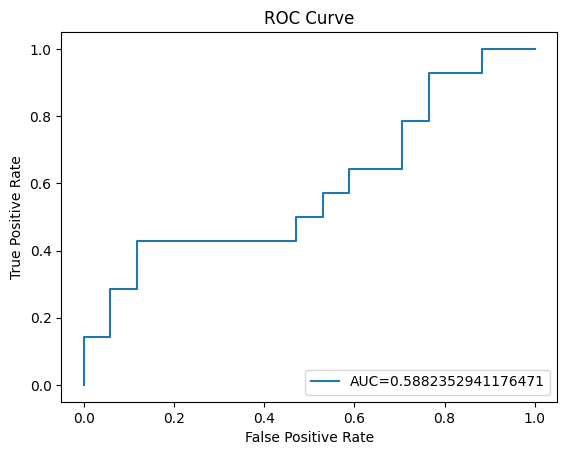

In [36]:
# Plotting the ROC curve
plt.plot(false_positive_rate, true_positive_rate, label = 'AUC='+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)